/home/shenghui/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


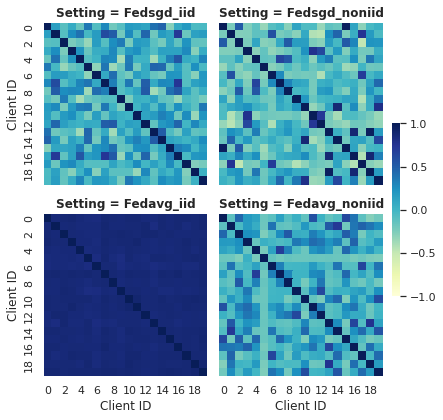

In [124]:
sim_sgd_noniid = np.load('updates_fedsgd_noniid.npy')
sim_avg_noniid = np.load('updates_fedavg_noniid.npy')
sim_sgd_iid = np.load('updates_fedsgd_iid.npy')
sim_avg_iid = np.load('updates_fedavg_iid.npy')
data = [("Setting = Fedsgd_iid", i, j, sim_sgd_iid[i,j]) for i in range(len(sim_avg_iid)) for j in range(len(sim_avg_iid))]
data.extend([("Setting = Fedsgd_noniid", i, j, sim_sgd_noniid[i,j]) 
                   for i in range(len(sim_avg_noniid)) 
                   for j in range(len(sim_avg_noniid))])
data.extend([("Setting = Fedavg_iid", i, j, sim_avg_iid[i,j]) 
                   for i in range(len(sim_avg_iid)) 
                   for j in range(len(sim_avg_noniid))])
data.extend([("Setting = Fedavg_noniid", i, j, sim_avg_noniid[i,j]) 
                   for i in range(len(sim_avg_noniid)) 
                   for j in range(len(sim_avg_noniid))])
df = pd.DataFrame(data, columns = ["Setting", 'i', 'j', 'value'])


methods=['method 1', 'method2', 'method 3', 'method 4']
times = range(0, 100, 10)
data = pd.DataFrame(list(itertools.product(methods, times, times)))
data.columns = ['method', 'dtsi','rtsi']
data['nw_score'] = np.random.sample(data.shape[0])

def facet_heatmap(data, color, **kws):
    data = data.pivot(index="i", columns='j', values='value')
    s = sns.heatmap(data, cmap='YlGnBu', center=0, **kws)  # <-- Pass kwargs to heatmap
    s.set(xlabel='Client ID', ylabel='Client ID')

with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(df, col="Setting", col_wrap=2, height=3, aspect=1)

cbar_ax = g.fig.add_axes([.92, .3, .02, .4])  # <-- Create a colorbar axes

g = g.map_dataframe(facet_heatmap,
                    cbar_ax=cbar_ax,
                    vmin=-1, vmax=1)  # <-- Specify the colorbar axes and limits

g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)
g.fig.subplots_adjust(right=.9) 
g.savefig("similarity.pdf", bbox_inches = "tight")